# Correlaciones

Se hace la correlación cruzada (cross correlation) entre los distintos contaminantes. Se saca un promedio de todas las estaciones.

## I. Importar datos.

Se comienza agregando las bibliotecas necesarias de python al archivo. Las que vienen por default en este notebook son las requeridas para importar y exportar archivos _csv_, manipular dataframes en _pandas_, graficar resultados usando _seaborn_ con algún nivel de interactividad haciendo uso de _widgets_.

Dependiendo del tipo de archivo en donde se tengan los datos, o bien la herramienta de visualización, se deben agregar las bibliotecas necesarias.

Se debe de tomar en cuenta el path en el que se encuentre el archivo con los datos y modificarlo a demanda en la parte correspondiente.

Es necesario que el archivo con los datos **ya se encuentre limpio** para correr este notebook. De lo contrario pueden aparecer resultados no deseados o "raros" en las matrices de correlación.

In [15]:
# Bibliotecas necesarias para correr este notebook

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from scipy import stats

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


# Modificar el "path" del directorio de trabajo
os.chdir("/home/pradel/Desktop/correlation/")

In [3]:
# Se importa el archivo csv con los datos usando pandas (se carga como un dataframe)

data = pd.read_csv("/home/pradel/Desktop/correlation/data_sample.csv")

In [4]:
# Se obtienen las primeras 5 filas de nuestro dataframe

data.head() 

,fecha,UVA,UVB,PA,CO,NO,NO2,NOX,O3,PM2.5,PMCO,SO2,RH,TMP,WSP,WDR,PM10
0,2012-01-01 00:00:00,0.0,0.0,590.0,0.3,2.6,13.8,16.2,15.1,9.4,6.3,1.6,68.3,11.4,3.2,294.9,14.8
1,2012-01-01 01:00:00,0.0,0.0,587.0,1.4,30.0,39.8,69.5,5.5,77.0,136.9,7.2,68.8,9.7,1.4,180.0,174.3
2,2012-01-01 02:00:00,0.0,0.0,587.0,1.7,39.7,40.0,79.6,4.3,121.0,38.0,8.2,72.6,9.1,1.6,139.6,164.6
3,2012-01-01 03:00:00,0.0,0.0,587.0,1.8,40.8,39.1,79.6,4.6,125.1,36.7,7.6,74.1,8.6,1.1,232.6,172.9
4,2012-01-01 04:00:00,0.0,0.0,587.0,2.0,51.2,37.8,88.9,4.1,129.6,37.0,6.9,75.3,8.2,1.0,225.6,167.6


## II. Correlaciones

La correlación es una herramienta estadística que describe el grado en el que se relacionan dos variables.

- Es _positiva_ cuando ambos valores incrementan juntos.
- Es _negativa_ cuando un valor disminuye mientras el otro incrementa.

La correlación esta normalizada con valores de $-1$ a $1$. Cuando la correlación es $0$ no existe la misma.

Para calcular las correlaciones se usa lo siguiente:

\begin{eqnarray}
r_{xy} = \frac{\displaystyle\sum_{i=1}^{n} (x_{i}-\bar{x})(y_{i}-\bar{y})}{\sqrt{\displaystyle\sum_{i=1}^{n}(x_{i}-\bar{x})^{2}\displaystyle\sum_{i=1}^{n}(y_{i}-\bar{y})^{2}}}
\end{eqnarray}

Usando el método `corr` en `pandas` se obtiene la matriz de correlación entre las variables.

Se pueden mostrar las correlaciones específicas entre cada variable a demanda, usando un widget interactivo de python. De esta manera no se pierde uno buscando valores en la matriz.

In [5]:
@interact
def correlaciones(X = list(data.select_dtypes('number').columns),
                  Y = list(data.select_dtypes('number').columns)):
        
    print(f"Correlación: {data[X].corr(data[Y])}")

interactive(children=(Dropdown(description='X', options=('UVA', 'UVB', 'PA', 'CO', 'NO', 'NO2', 'NOX', 'O3', '…

In [6]:
data_corr = data.corr()

In [7]:
data_corr.head()

,UVA,UVB,PA,CO,NO,NO2,NOX,O3,PM2.5,PMCO,SO2,RH,TMP,WSP,WDR,PM10
UVA,1.000000,0.955600,0.107344,-0.046440,-0.127991,-0.113325,-0.140269,0.637839,0.275274,0.128521,-0.007434,-0.475098,0.579646,0.162357,-0.276112,0.123386
UVB,0.955600,1.000000,0.069185,-0.089377,-0.166616,-0.131420,-0.177312,0.630518,0.249498,0.093927,-0.018032,-0.466078,0.561885,0.160466,-0.256995,0.086847
PA,0.107344,0.069185,1.000000,0.184208,0.099352,0.089986,0.109460,-0.113144,0.102240,0.120426,0.069579,0.010163,-0.098367,-0.082458,0.088179,0.076456
CO,-0.046440,-0.089377,0.184208,1.000000,0.870824,0.726255,0.939645,-0.307126,0.526708,0.470420,0.177904,0.101937,-0.318787,-0.471834,-0.185674,0.593283
NO,-0.127991,-0.166616,0.099352,0.870824,1.000000,0.460770,0.956901,-0.434313,0.291982,0.373522,0.168676,0.210691,-0.464448,-0.463052,-0.101504,0.423978


Se grafica la correlación como un heatmap.

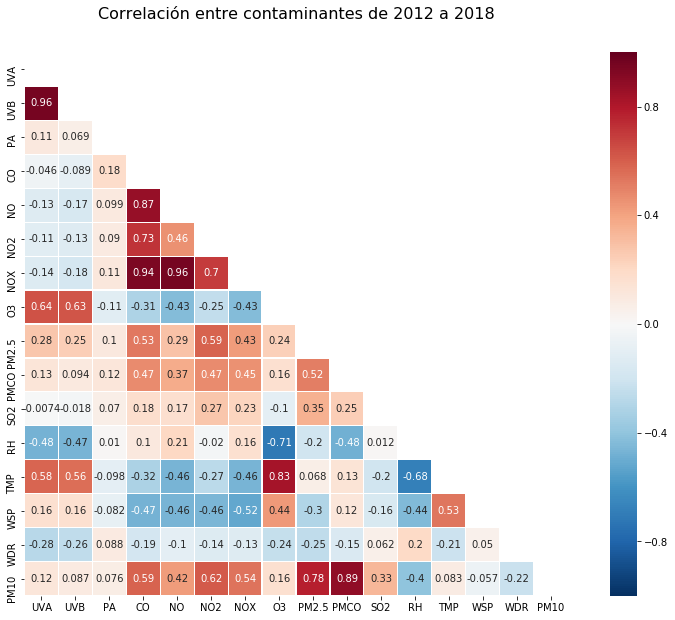

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
colormap = plt.cm.RdBu_r
plt.figure(figsize=(15,10))
plt.title(u'Correlación entre contaminantes de 2012 a 2018', y=1.05, size=16)

mask = np.zeros_like(data_corr)
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(data_corr, mask=mask, linewidths=0.1,vmin = -1.0, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [9]:
import cufflinks as cf

@interact
def matriz(x = (0.0,1.0,0.1)):
    colormap = plt.cm.RdBu_r
    plt.figure(figsize = (17,12))
    plt.title(u'Correlaciones', y = 1.05, size = 16)
    
    testing = data.corr() # 'Copia' de la matriz de correlación
    indices = abs(testing) >= x # Encontrar los valores mayores o iguales a x en la matriz de correlación
    testing[indices] = 0 # Los valores que cumplen la condición se hacen cero (enmascaramiento)
                      
    mask = testing[indices].to_numpy() # Construimos un arreglo con el enmascaramiento
    mask[np.triu_indices_from(mask)] = True
    
    ind_row = []
    for i in range(len(mask)):
        if (0 in mask[i]) == False:
            ind_row.append(i)
            
    mask = np.delete(mask, ind_row, 0)
    
    t2 = data.corr()
    t2.drop(t2.index[ind_row], inplace=True)
    
    mask_col = np.transpose(mask)
    ind_col = []
    for j in range(len(mask_col)):
        if (0 in mask_col[j]) == False:
            ind_col.append(j)
        
    mask = np.delete(mask, ind_col, 1)
    
    t2.drop(t2.columns[ind_col],axis=1,inplace=True)
          
    svm = sns.heatmap(t2, mask=mask, linewidths = 0.1, vmin = -1.0, vmax = 1.0,
                     square = True, cmap = colormap, linecolor = 'white', annot = True, annot_kws={"fontsize":13})

/home/pradel/miniconda3/envs/pradel_gpd/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:558: DeprecationWarning:

plotly.graph_objs.YAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.YAxis
  - plotly.graph_objs.layout.scene.YAxis


/home/pradel/miniconda3/envs/pradel_gpd/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:531: DeprecationWarning:

plotly.graph_objs.XAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.XAxis
  - plotly.graph_objs.layout.scene.XAxis




interactive(children=(FloatSlider(value=0.5, description='x', max=1.0), Output()), _dom_classes=('widget-inter…

## III. Autocorrelaciones y Correlaciones Cruzadas

Si nuestro dataset tiene mediciones de tiempo es posible calcular las correlaciones cruzadas (correlación entre dos variables distintas a diferentes instantes de tiempo, es decir un _lag_) o bien la autocorrelación (correlación entre una misma variable a diferentes instantes de tiempo).

### A 72 horas

In [23]:
def data_lag(df,lag=0,NON_DER=['fecha']):
    df = df.copy()
    if not lag:
        return df
    cols ={}
    for i in range(1,lag+1):
        for x in list(df.columns):
            if x not in NON_DER:
                if not x in cols:
                    cols[x] = ['{}_{}'.format(x, i)]
                else:
                    cols[x].append('{}_{}'.format(x, i))
    for k,v in cols.items():
        columns = v
        dfn = pd.DataFrame(data=None, columns=columns, index=df.index)    
        i = 1
        for c in columns:
            dfn[c] = df[k].shift(periods=i)
            i+=1
        df = pd.concat([df, dfn], axis=1, join_axes=[df.index])
    return df

In [25]:
data_72 = data_lag(data, 72)

In [26]:
data_72_corr = data_72.corr()

In [27]:
data_72_corr.head()

,UVA,UVB,PA,CO,NO,NO2,NOX,O3,PM2.5,PMCO,...,PM10_63,PM10_64,PM10_65,PM10_66,PM10_67,PM10_68,PM10_69,PM10_70,PM10_71,PM10_72
UVA,1.000000,0.955600,0.107344,-0.046440,-0.127991,-0.113325,-0.140269,0.637839,0.275274,0.128521,...,-0.107520,-0.050330,-0.003417,0.027704,0.043911,0.051076,0.057821,0.071974,0.099092,0.138199
UVB,0.955600,1.000000,0.069185,-0.089377,-0.166616,-0.131420,-0.177312,0.630518,0.249498,0.093927,...,-0.093490,-0.034818,0.013792,0.044059,0.054882,0.052442,0.047525,0.051722,0.073757,0.113481
PA,0.107344,0.069185,1.000000,0.184208,0.099352,0.089986,0.109460,-0.113144,0.102240,0.120426,...,0.113514,0.107144,0.097463,0.087730,0.079488,0.074966,0.073672,0.074932,0.078084,0.080416
CO,-0.046440,-0.089377,0.184208,1.000000,0.870824,0.726255,0.939645,-0.307126,0.526708,0.470420,...,0.190026,0.152279,0.120263,0.107418,0.122048,0.162460,0.215321,0.263293,0.290061,0.275544
NO,-0.127991,-0.166616,0.099352,0.870824,1.000000,0.460770,0.956901,-0.434313,0.291982,0.373522,...,0.150177,0.123662,0.105905,0.106326,0.129356,0.169737,0.211755,0.236967,0.231434,0.181179


### Correlación entre O3 y los demás contaminantes


El O3 es uno de los contaminantes cuyos valores determinan las contingencias ambientales, interesa saber de que manera se correlacionan con los demás contaminantes y en que ciclos de tiempo dicha correlación es más fuerte.

Se graficará esta correlación para el rango de 0 a 72 horas obtenido en la sección anterior.

Antes de correr la correlación se le vuelve a dar estructura al dataframe para poder graficar de manera óptima.

In [29]:
# Se aísla sólo la columna que corresponde al O3
O3_72 = data_72_corr[["O3"]]

In [30]:
# Se reinicia el índice del dataframe
O3_72.reset_index(inplace=True)

In [31]:
# Se renombran las columnas para mayor comprensión
O3_72.columns = ['contaminante', 'valor']

El dataframe tendrá la siguiente estructura

In [32]:
O3_72.head()

,contaminante,valor
0,UVA,0.637839
1,UVB,0.630518
2,PA,-0.113144
3,CO,-0.307126
4,NO,-0.434313


In [34]:
hora_0_o3 = O3_72.loc[0:15]

In [35]:
hora_0_o3.drop(['contaminante'], axis=1, inplace = True)

In [36]:
hora_0_o3 = hora_0_o3.transpose()

In [37]:
hora_0_o3.columns = ['UVA', 'UVB', 'PA', 'CO', 'NO', 'NO2', 'NOX', 'O3', 'PM25', 'PMCO', 'SO2', 'RH', 'TMP'
                  , 'WSP', 'WDR', 'PM10']

In [38]:
hora_0_o3 = hora_0_o3.reset_index(drop=True)

In [39]:
hora_0_o3.head()

,UVA,UVB,PA,CO,NO,NO2,NOX,O3,PM25,PMCO,SO2,RH,TMP,WSP,WDR,PM10
0,0.637839,0.630518,-0.113144,-0.307126,-0.434313,-0.248507,-0.43146,1.0,0.236128,0.157639,-0.100684,-0.71309,0.828244,0.435946,-0.240342,0.163479


In [40]:
hora_72_o3 = O3_72.loc[16:]
hora_72_o3.shape

(1152, 2)

In [41]:
dfs_72_o3 = \
{name: group for name, group in hora_72_o3.groupby(np.arange(1152) // 72)}

In [42]:
for i in range(0,16):
    dfs_72_o3[i] = dfs_72_o3[i].reset_index(drop = True)

In [43]:
hora_72_o3_c = pd.concat({k:v for (k,v) in dfs_72_o3.items()}, axis = 1)

In [44]:
hora_72_o3_c.columns = hora_72_o3_c.columns.droplevel()

In [45]:
hora_72_o3_c.drop(['contaminante'], axis=1, inplace = True)

In [46]:
hora_72_o3_c.columns = ['UVA', 'UVB', 'PA', 'CO', 'NO', 'NO2', 'NOX', 'O3', 'PM25', 'PMCO', 'SO2', 'RH'
             , 'TMP', 'WSP', 'WDR', 'PM10']

In [48]:
hora_72_o3_c.head()

,UVA,UVB,PA,CO,NO,NO2,NOX,O3,PM25,PMCO,SO2,RH,TMP,WSP,WDR,PM10
0,0.765117,0.754991,-0.080702,-0.185708,-0.324120,-0.147038,-0.309422,0.940698,0.339028,0.186335,-0.055020,-0.671755,0.773338,0.310206,-0.302206,0.216998
1,0.802419,0.785276,-0.047122,-0.026633,-0.160734,-0.025243,-0.137854,0.797727,0.416837,0.230587,-0.005294,-0.579908,0.655619,0.179039,-0.341931,0.282632
2,0.751004,0.723152,-0.017447,0.147279,0.037981,0.093016,0.061036,0.600658,0.463512,0.275272,0.043611,-0.449511,0.490207,0.043928,-0.354826,0.344972
3,0.626835,0.587265,0.004856,0.303889,0.238007,0.187485,0.253198,0.380821,0.475369,0.304647,0.084618,-0.296354,0.296866,-0.088042,-0.341393,0.387392
4,0.455851,0.407691,0.017581,0.413662,0.404089,0.244005,0.405581,0.166247,0.452752,0.306708,0.112308,-0.137781,0.097082,-0.209079,-0.306782,0.397620


In [49]:
O3_72_df = pd.concat([hora_0_o3, hora_72_o3_c], axis=0, join='outer', ignore_index=True)

In [50]:
horas = O3_72_df.index
O3_72_df.insert(loc=0, column='horas', value=horas)

In [51]:
O3_72_df.head()

,horas,UVA,UVB,PA,CO,NO,NO2,NOX,O3,PM25,PMCO,SO2,RH,TMP,WSP,WDR,PM10
0,0,0.637839,0.630518,-0.113144,-0.307126,-0.434313,-0.248507,-0.431460,1.000000,0.236128,0.157639,-0.100684,-0.713090,0.828244,0.435946,-0.240342,0.163479
1,1,0.765117,0.754991,-0.080702,-0.185708,-0.324120,-0.147038,-0.309422,0.940698,0.339028,0.186335,-0.055020,-0.671755,0.773338,0.310206,-0.302206,0.216998
2,2,0.802419,0.785276,-0.047122,-0.026633,-0.160734,-0.025243,-0.137854,0.797727,0.416837,0.230587,-0.005294,-0.579908,0.655619,0.179039,-0.341931,0.282632
3,3,0.751004,0.723152,-0.017447,0.147279,0.037981,0.093016,0.061036,0.600658,0.463512,0.275272,0.043611,-0.449511,0.490207,0.043928,-0.354826,0.344972
4,4,0.626835,0.587265,0.004856,0.303889,0.238007,0.187485,0.253198,0.380821,0.475369,0.304647,0.084618,-0.296354,0.296866,-0.088042,-0.341393,0.387392


In [52]:
O3_72_df.to_csv(r'/home/pradel/Desktop/Forecast_CDMX_pollution/correlacion/sub_dataset/corr_o3_72.csv')

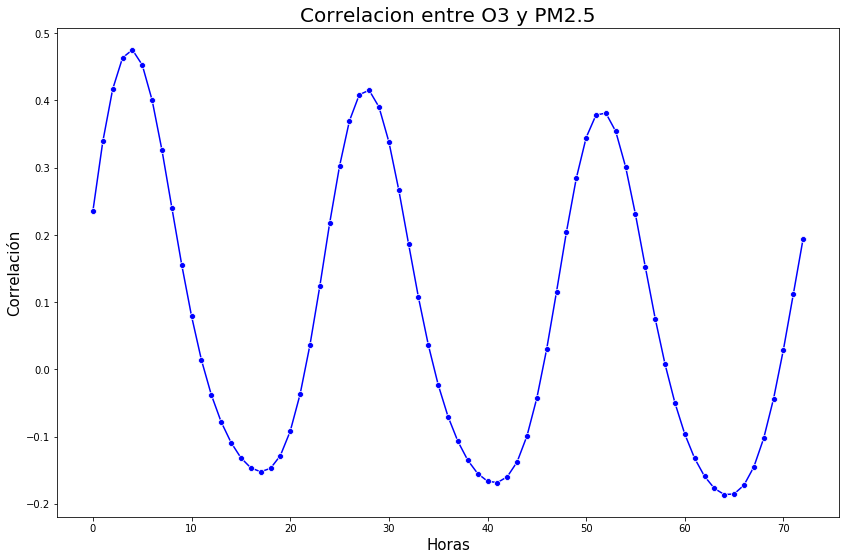

In [54]:
fig, ax = plt.subplots(figsize=(14,9))
o3_pm25 = sns.lineplot(x = 'horas', y = 'PM25', data = O3_72_df, marker = 'o',  color='b', ax=ax)

o3_pm25.axes.set_title("Correlacion entre O3 y PM2.5",fontsize=20)
o3_pm25.set_xlabel("Horas",fontsize=15)
o3_pm25.set_ylabel("Correlación",fontsize=15)
o3_pm25.tick_params(labelsize=10)
plt.show()

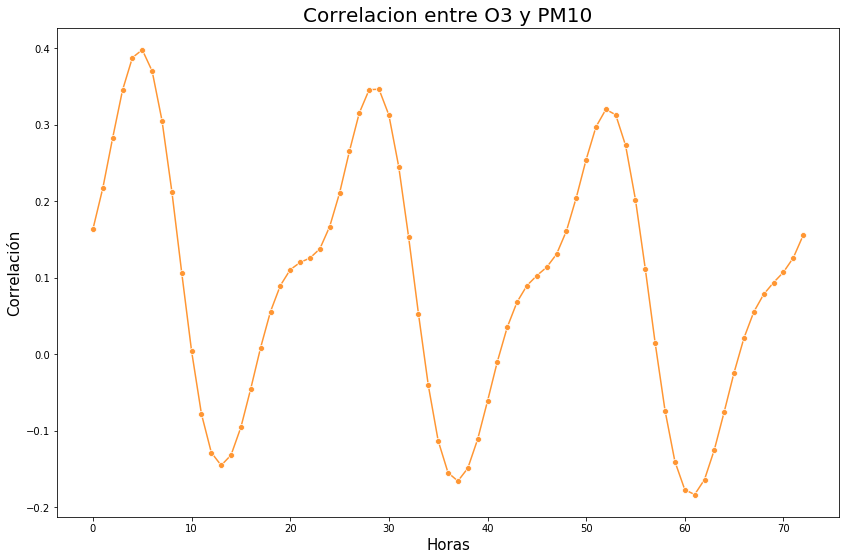

In [56]:
fig, ax = plt.subplots(figsize=(14,9))
o3_pm10 = sns.lineplot(x = 'horas', y = 'PM10', data = O3_72_df, marker = 'o',  color='#FF9633', ax=ax)

o3_pm10.axes.set_title("Correlacion entre O3 y PM10",fontsize=20)
o3_pm10.set_xlabel("Horas",fontsize=15)
o3_pm10.set_ylabel("Correlación",fontsize=15)
o3_pm10.tick_params(labelsize=10)
plt.show()